In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fpath = 'C:/Users/USUARIO/Downloads/Formula_1'
circuits = pd.read_csv(f'{fpath}/circuits.csv',  na_values=r'\N')
results = pd.read_csv(f'{fpath}/results.csv')
races = pd.read_csv(f'{fpath}/races.csv')
drivers = pd.read_csv(f'{fpath}/drivers.csv')
constructors = pd.read_csv(f'{fpath}/constructors.csv')

In [3]:
df = pd.merge(results,races[['raceId','year','name','round']],on = 'raceId',how = 'left')
df = pd.merge(df,drivers[['driverId','driverRef','nationality']],on = 'driverId',how ='left')
df = pd.merge(df,constructors[['constructorId','name','nationality']],on ='constructorId',how ='left')

In [4]:
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,...,1:50.994,227.169,1,2023,Belgian Grand Prix,12,ricciardo,Australian,AlphaTauri,Italian
26076,26082,1110,858,3,2,18,17,17,17,0.0,...,1:50.486,228.213,1,2023,Belgian Grand Prix,12,sargeant,American,Williams,British
26077,26083,1110,807,210,27,0,18,18,18,0.0,...,1:49.907,229.415,1,2023,Belgian Grand Prix,12,hulkenberg,German,Haas F1 Team,American
26078,26084,1110,832,6,55,4,\N,R,19,0.0,...,1:53.138,222.864,130,2023,Belgian Grand Prix,12,sainz,Spanish,Ferrari,Italian


In [5]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'name_x', 'round', 'driverRef',
       'nationality_x', 'name_y', 'nationality_y'],
      dtype='object')

In [6]:
df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','raceId','driverId','constructorId'],axis =1,inplace = True)

In [7]:
df.rename(columns = {'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality',
                    'name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace = True)

In [8]:
df

,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driver,driver_nationality,constructor_name,constructor_nationality
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,19,16,0.0,+1:43.071,5053521,15,1:50.994,227.169,2023,Belgian Grand Prix,12,ricciardo,Australian,AlphaTauri,Italian
26076,18,17,0.0,+1:44.476,5054926,9,1:50.486,228.213,2023,Belgian Grand Prix,12,sargeant,American,Williams,British
26077,0,18,0.0,+1:50.450,5060900,4,1:49.907,229.415,2023,Belgian Grand Prix,12,hulkenberg,German,Haas F1 Team,American
26078,4,19,0.0,\N,\N,19,1:53.138,222.864,2023,Belgian Grand Prix,12,sainz,Spanish,Ferrari,Italian


In [9]:
df = df[['year','gp_name','round','driver','constructor_name','grid','positionOrder','points','time',
         'milliseconds','fastest_lap_rank','fastestLapTime','fastestLapSpeed',
        'driver_nationality','constructor_nationality']]

In [10]:
df = df[(df['year'] != 2019)]

In [11]:
df = df.sort_values(by =['year','round','positionOrder'],ascending=[False,True,True])

In [12]:
df

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
25840,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736,6,1:36.236,202.452,Dutch,Austrian
25841,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18.0,+11.987,5648723,7,1:36.344,202.225,Mexican,Austrian
25842,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15.0,+38.637,5675373,5,1:36.156,202.620,Spanish,British
25843,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12.0,+48.052,5684788,14,1:37.130,200.588,Spanish,Italian
25844,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10.0,+50.977,5687713,10,1:36.546,201.802,British,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,\N,\N,\N,\N,\N,Italian,Swiss
20172,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,\N,\N,\N,\N,\N,French,French
20173,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,\N,\N,\N,\N,\N,Thai,Italian
20174,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,\N,\N,\N,\N,\N,German,Italian


In [13]:
df.time.replace('\\N',np.nan,inplace = True)
df.milliseconds.replace('\\N',np.nan,inplace = True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace = True)
df.fastestLapTime.replace('\\N',np.nan,inplace = True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace = True)

In [14]:
df.fastestLapSpeed = df.fastestLapSpeed.astype(float)
df.fastest_lap_rank = df.fastest_lap_rank.astype(float)
df.milliseconds = df.milliseconds.astype(float)

In [15]:
df.reset_index(drop=True, inplace = True)

In [16]:
print(df.shape)

(25660, 15)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25660 non-null  int64  
 1   gp_name                  25660 non-null  object 
 2   round                    25660 non-null  int64  
 3   driver                   25660 non-null  object 
 4   constructor_name         25660 non-null  object 
 5   grid                     25660 non-null  int64  
 6   positionOrder            25660 non-null  int64  
 7   points                   25660 non-null  float64
 8   time                     7055 non-null   object 
 9   milliseconds             7054 non-null   float64
 10  fastest_lap_rank         7411 non-null   float64
 11  fastestLapTime           7199 non-null   object 
 12  fastestLapSpeed          7199 non-null   float64
 13  driver_nationality       25660 non-null  object 
 14  constructor_nationalit

In [18]:
df.head(10)

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736.0,6.0,1:36.236,202.452,Dutch,Austrian
1,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18.0,+11.987,5648723.0,7.0,1:36.344,202.225,Mexican,Austrian
2,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15.0,+38.637,5675373.0,5.0,1:36.156,202.620,Spanish,British
3,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12.0,+48.052,5684788.0,14.0,1:37.130,200.588,Spanish,Italian
4,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10.0,+50.977,5687713.0,10.0,1:36.546,201.802,British,German
5,2023,Bahrain Grand Prix,1,stroll,Aston Martin,8,6,8.0,+54.502,5691238.0,9.0,1:36.546,201.802,Canadian,British
6,2023,Bahrain Grand Prix,1,russell,Mercedes,6,7,6.0,+55.873,5692609.0,17.0,1:37.221,200.401,British,German
7,2023,Bahrain Grand Prix,1,bottas,Alfa Romeo,12,8,4.0,+1:12.647,5709383.0,18.0,1:37.379,200.075,Finnish,Swiss
8,2023,Bahrain Grand Prix,1,gasly,Alpine F1 Team,20,9,2.0,+1:13.753,5710489.0,2.0,1:35.068,204.939,French,French
9,2023,Bahrain Grand Prix,1,albon,Williams,15,10,1.0,+1:29.774,5726510.0,15.0,1:37.144,200.559,Thai,British


In [19]:
df.tail(10)

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
25650,1950,Italian Grand Prix,7,biondetti,Ferrari,25,18,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Italian
25651,1950,Italian Grand Prix,7,louveau,Talbot-Lago,16,19,0.0,NaN,NaN,NaN,NaN,NaN,French,French
25652,1950,Italian Grand Prix,7,comotti,Maserati,26,20,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Italian
25653,1950,Italian Grand Prix,7,trintignant,Simca,12,21,0.0,NaN,NaN,NaN,NaN,NaN,French,French
25654,1950,Italian Grand Prix,7,chiron,Maserati,19,22,0.0,NaN,NaN,NaN,NaN,NaN,Monegasque,Italian
25655,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
25656,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
25657,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
25658,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian
25659,1950,Italian Grand Prix,7,bonetto,Milano,23,27,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Italian


In [20]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

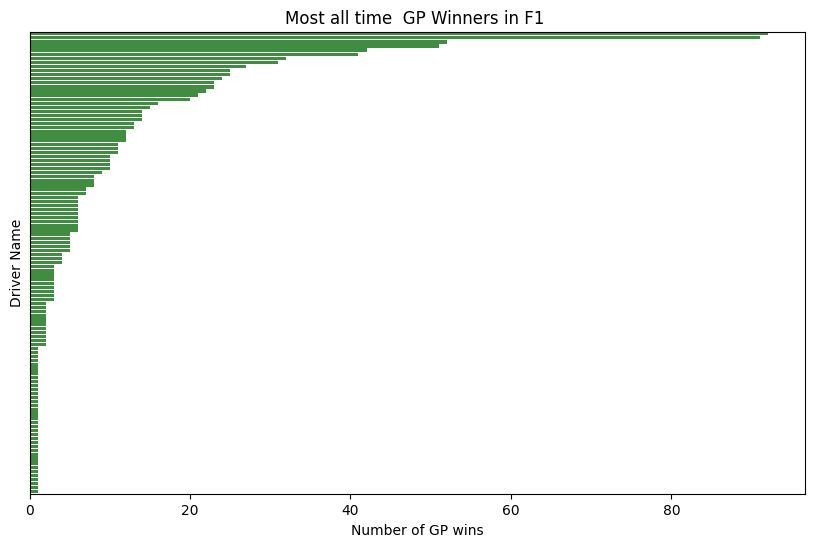

In [21]:
driver_winner = df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot

sb.barplot(data = driver_winner,y='driver',x='positionOrder',color='green',alpha=0.8)
plt.title('Most all time  GP Winners in F1 ')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [22]:
df_2= df[(df['year'] > 2000)]

In [23]:
df_2

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2023,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,1,25.0,1:33:56.736,5636736.0,6.0,1:36.236,202.452,Dutch,Austrian
1,2023,Bahrain Grand Prix,1,perez,Red Bull,2,2,18.0,+11.987,5648723.0,7.0,1:36.344,202.225,Mexican,Austrian
2,2023,Bahrain Grand Prix,1,alonso,Aston Martin,5,3,15.0,+38.637,5675373.0,5.0,1:36.156,202.620,Spanish,British
3,2023,Bahrain Grand Prix,1,sainz,Ferrari,4,4,12.0,+48.052,5684788.0,14.0,1:37.130,200.588,Spanish,Italian
4,2023,Bahrain Grand Prix,1,hamilton,Mercedes,7,5,10.0,+50.977,5687713.0,10.0,1:36.546,201.802,British,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,2001,Japanese Grand Prix,17,rosa,Jaguar,16,18,0.0,NaN,NaN,NaN,NaN,NaN,Spanish,British
8603,2001,Japanese Grand Prix,17,enge,Prost,19,19,0.0,NaN,NaN,NaN,NaN,NaN,Czech,French
8604,2001,Japanese Grand Prix,17,irvine,Jaguar,13,20,0.0,NaN,NaN,NaN,NaN,NaN,British,British
8605,2001,Japanese Grand Prix,17,raikkonen,Sauber,12,21,0.0,NaN,NaN,NaN,NaN,NaN,Finnish,Swiss


([], [])

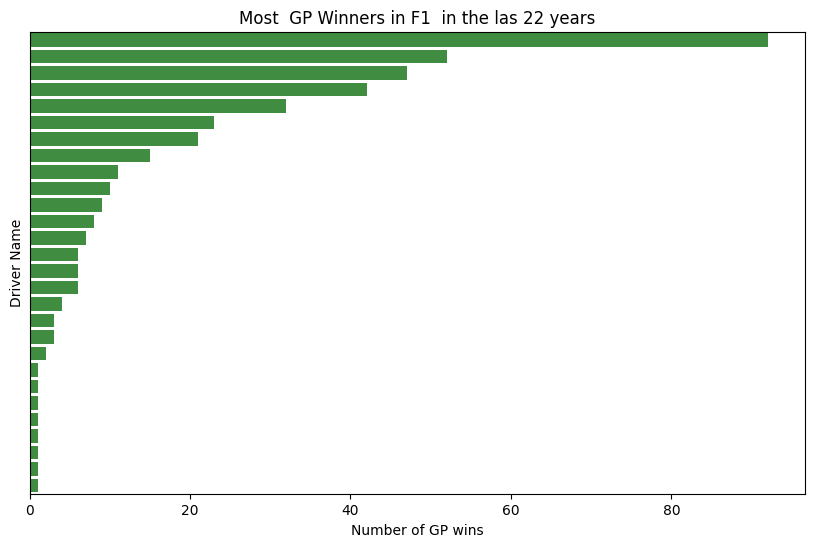

In [24]:
driver_winner_2000 = df_2.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot

sb.barplot(data = driver_winner_2000,y='driver',x='positionOrder',color='green',alpha=0.8)
plt.title('Most  GP Winners in F1  in the las 22 years')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [25]:
#crear un nuevo dataframe de los  top 10 gp ganadores

top10Drivers =driver_winner.head(10)

print(top10Drivers)

               driver  positionOrder
0            hamilton             92
1  michael_schumacher             91
2              vettel             52
3               prost             51
4      max_verstappen             42
5               senna             41
6              alonso             32
7             mansell             31
8             stewart             27
9               lauda             25


In [26]:
top10drivers_2000=driver_winner_2000.head(10)
print(top10drivers_2000)

               driver  positionOrder
0            hamilton             92
1              vettel             52
2  michael_schumacher             47
3      max_verstappen             42
4              alonso             32
5             rosberg             23
6           raikkonen             21
7              button             15
8               massa             11
9         barrichello             10


Text(0.5, 0, 'Number of GP wins')

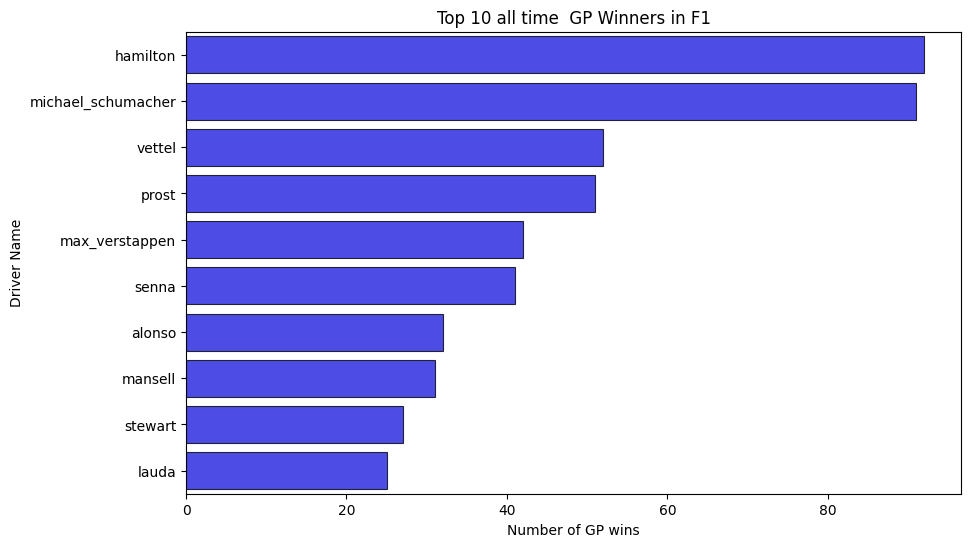

In [27]:
#top 10 conductores plot

sb.barplot(data=top10Drivers,y='driver',x='positionOrder',color='blue',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('Top 10 all time  GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

Text(0.5, 0, 'Number of GP wins')

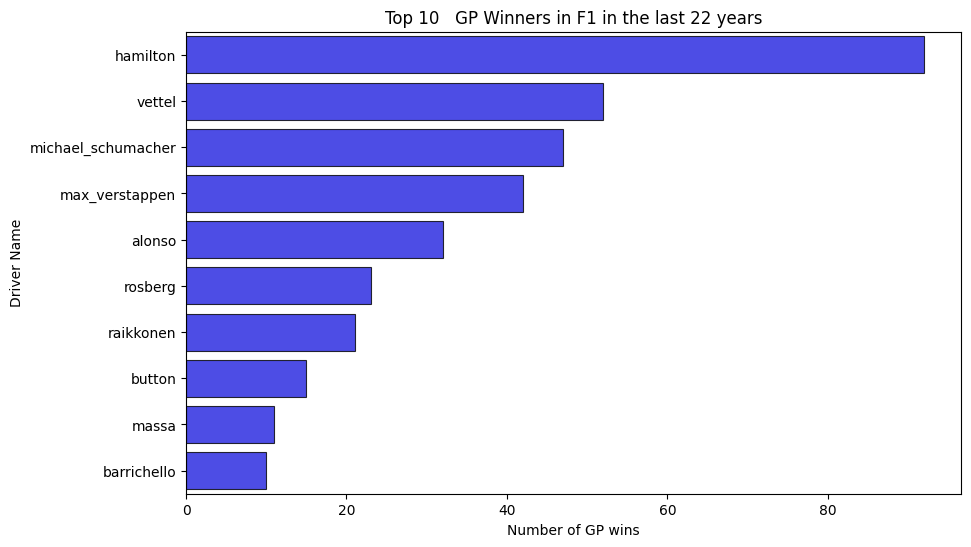

In [28]:
#top 10 conductores plot

sb.barplot(data=top10drivers_2000,y='driver',x='positionOrder',color='blue',alpha=0.8,linewidth=.8,edgecolor='black')
plt.title('Top 10   GP Winners in F1 in the last 22 years')
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

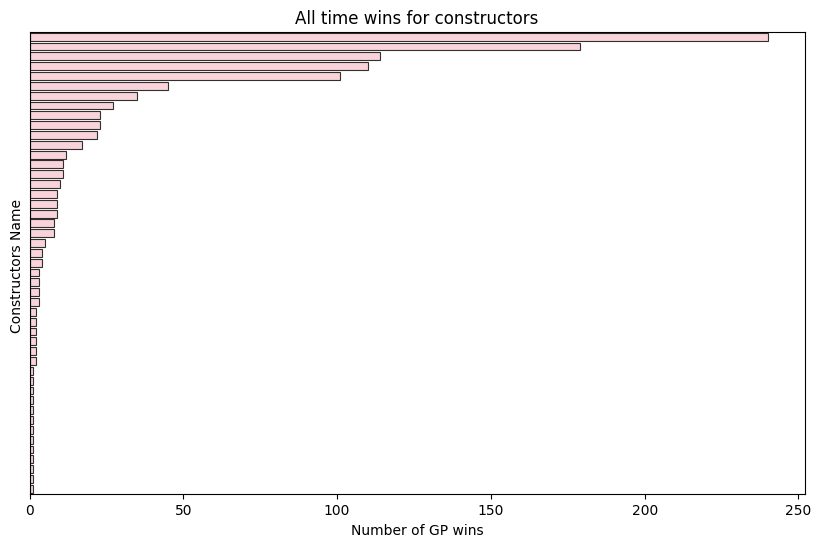

In [29]:
constructor_winner =df.loc[df['positionOrder']== 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot
sb.barplot (data = constructor_winner, y = 'constructor_name', x = 'positionOrder',
         color = 'pink', alpha = 0.8, linewidth=.8, edgecolor="black")
plt. title( 'All time wins for constructors')
plt.ylabel( 'Constructors Name ')
plt.xlabel('Number of GP wins')
plt.yticks([]);

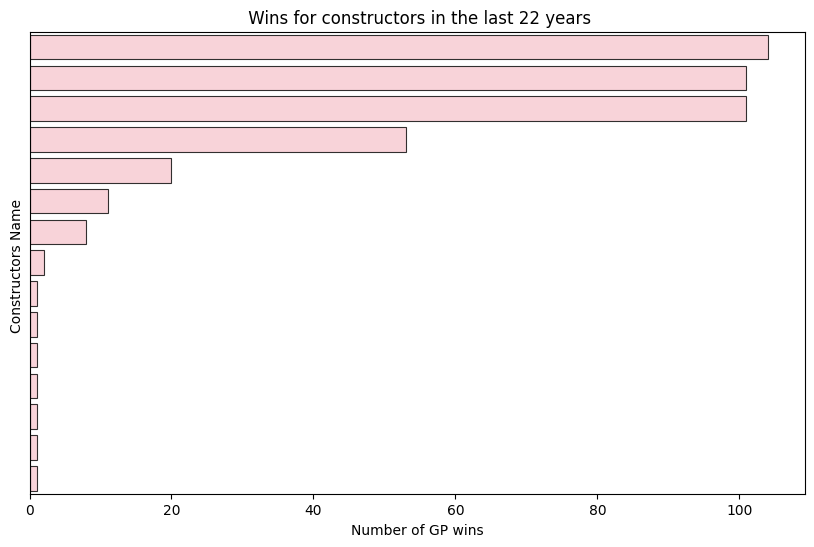

In [30]:
constructor_winner_2000 =df_2.loc[df['positionOrder']== 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#barplot
sb.barplot (data = constructor_winner_2000, y = 'constructor_name', x = 'positionOrder',
         color = 'pink', alpha = 0.8, linewidth=.8, edgecolor="black")
plt. title( ' Wins for constructors in the last 22 years')
plt.ylabel( 'Constructors Name ')
plt.xlabel('Number of GP wins')
plt.yticks([]);

In [31]:
# top 10 GP ganadreos contructores
top10constructors = constructor_winner.head(10)


(top10constructors)

,constructor_name,positionOrder
0,Ferrari,240
1,McLaren,179
2,Williams,114
3,Mercedes,110
4,Red Bull,101
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


In [32]:
# top 10 GP ganadreos contructores
top10constructors_2000 = constructor_winner_2000.head(10)


(top10constructors_2000)

,constructor_name,positionOrder
0,Ferrari,104
1,Mercedes,101
2,Red Bull,101
3,McLaren,53
4,Renault,20
5,Williams,11
6,Brawn,8
7,Lotus F1,2
8,AlphaTauri,1
9,Alpine F1 Team,1


Text(0.5, 0, 'Number of GP wins')

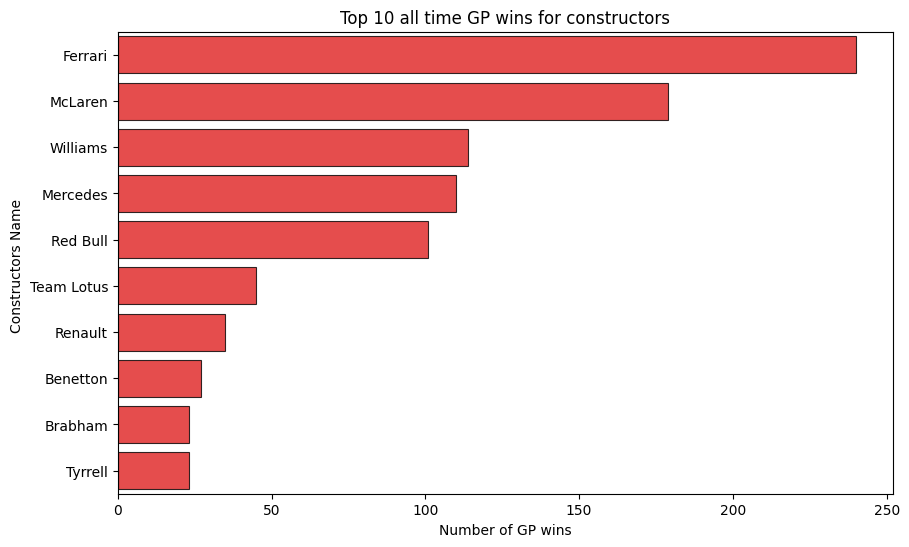

In [33]:
#grafica de barras top 10 constructores
sb.barplot (data = top10constructors, y = 'constructor_name', x = 'positionOrder',
         color = 'red', alpha = 0.8, linewidth=.8, edgecolor="black")
plt. title( 'Top 10 all time GP wins for constructors')
plt.ylabel( 'Constructors Name ')
plt.xlabel('Number of GP wins')

Text(0.5, 0, 'Number of GP wins')

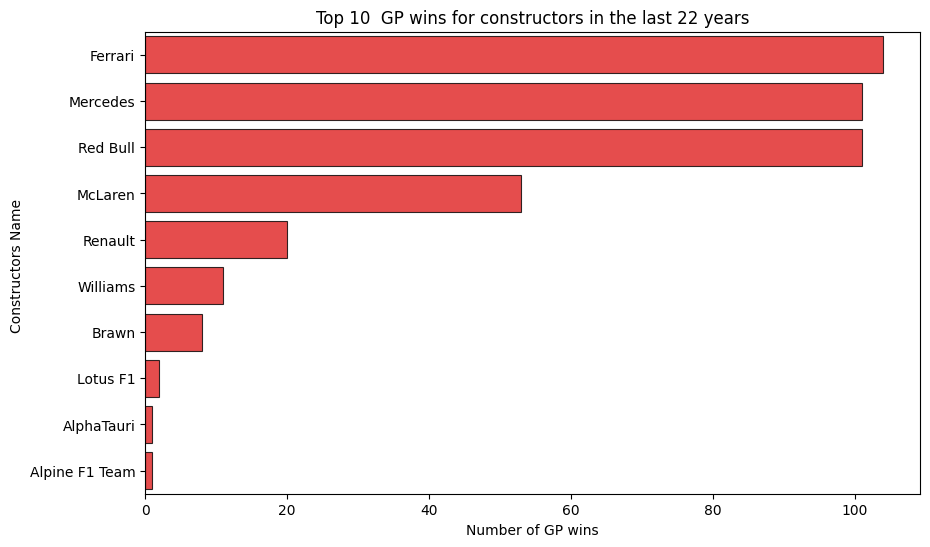

In [34]:
#grafica de barras top 10 constructores
sb.barplot (data = top10constructors_2000, y = 'constructor_name', x = 'positionOrder',
         color = 'red', alpha = 0.8, linewidth=.8, edgecolor="black")
plt. title( 'Top 10  GP wins for constructors in the last 22 years')
plt.ylabel( 'Constructors Name ')
plt.xlabel('Number of GP wins')

In [35]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


Slope (gradient) of the regression line: 0.4378693357716615


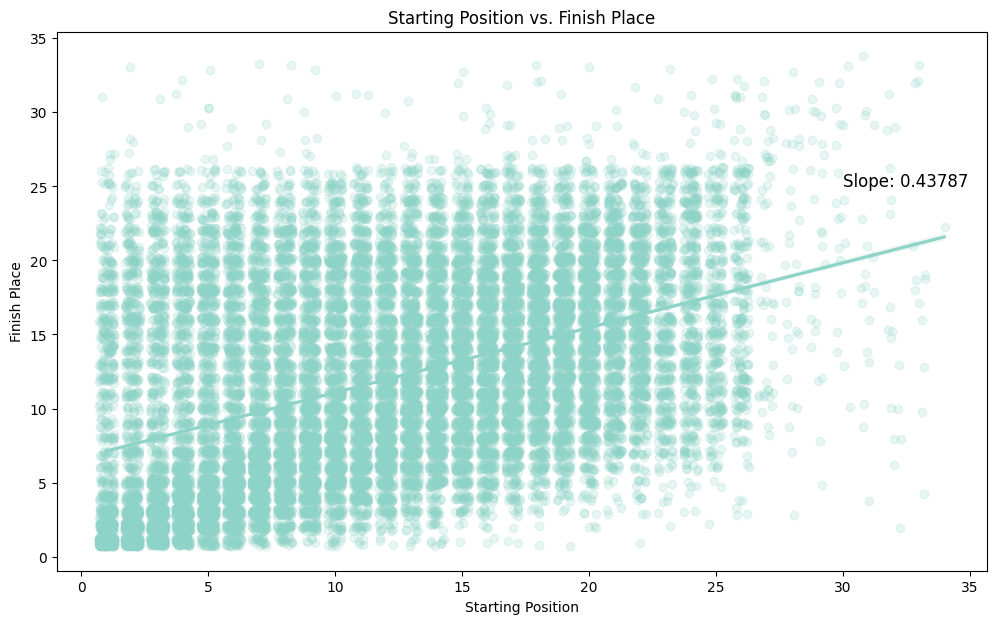

In [36]:

import seaborn as sb
from scipy.stats import linregress

df_no_zero = df[df['grid'] != 0]

slope, intercept, r_value, p_value, std_err = linregress(df_no_zero['grid'], df_no_zero['positionOrder'])

# Plot
plt.figure(figsize=[12, 7])
sb.regplot(data=df_no_zero, x='grid', y='positionOrder', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha': 1/5})
plt.text(30, 25, f'Slope: {slope:.5f}', fontsize=12, color='black')
plt.title('Starting Position vs. Finish Place')
plt.ylabel('Finish Place')
plt.xlabel('Starting Position')

# Print the slope
print("Slope (gradient) of the regression line:", slope)


Slope (gradient) of the regression line: 0.5807497404232933


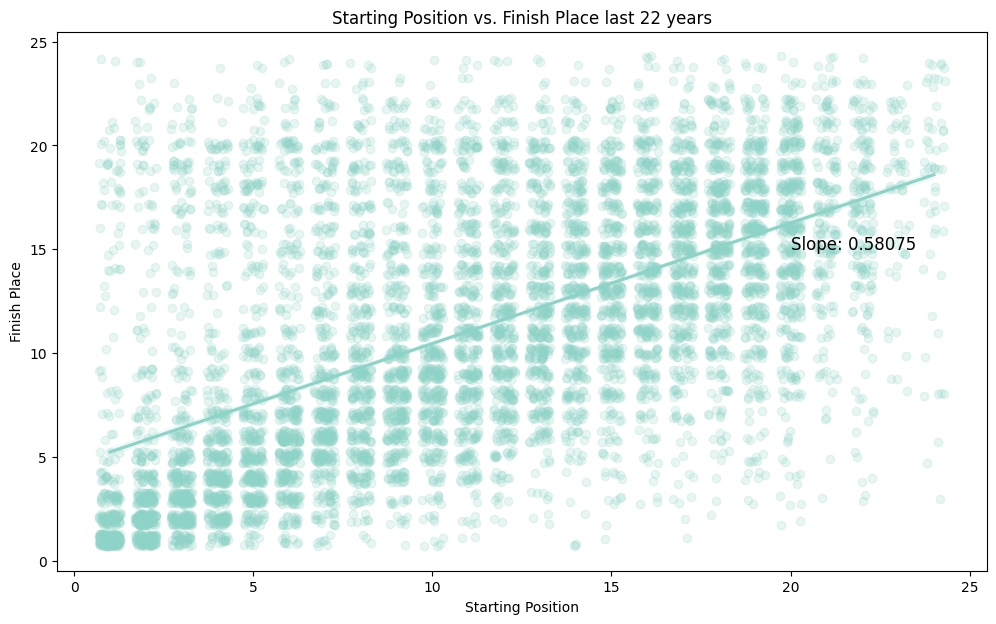

In [37]:

import seaborn as sb
from scipy.stats import linregress

df_no_zero_2 = df_2[df_2['grid'] != 0]

slope, intercept, r_value, p_value, std_err = linregress(df_no_zero_2['grid'], df_no_zero_2['positionOrder'])

# Plot
plt.figure(figsize=[12, 7])
sb.regplot(data=df_no_zero_2, x='grid', y='positionOrder', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha': 1/5})
plt.title('Starting Position vs. Finish Place last 22 years')
plt.ylabel('Finish Place')
plt.xlabel('Starting Position')
plt.text(20, 15, f'Slope: {slope:.5f}', fontsize=12, color='black')
# Print the slope
print("Slope (gradient) of the regression line:", slope)

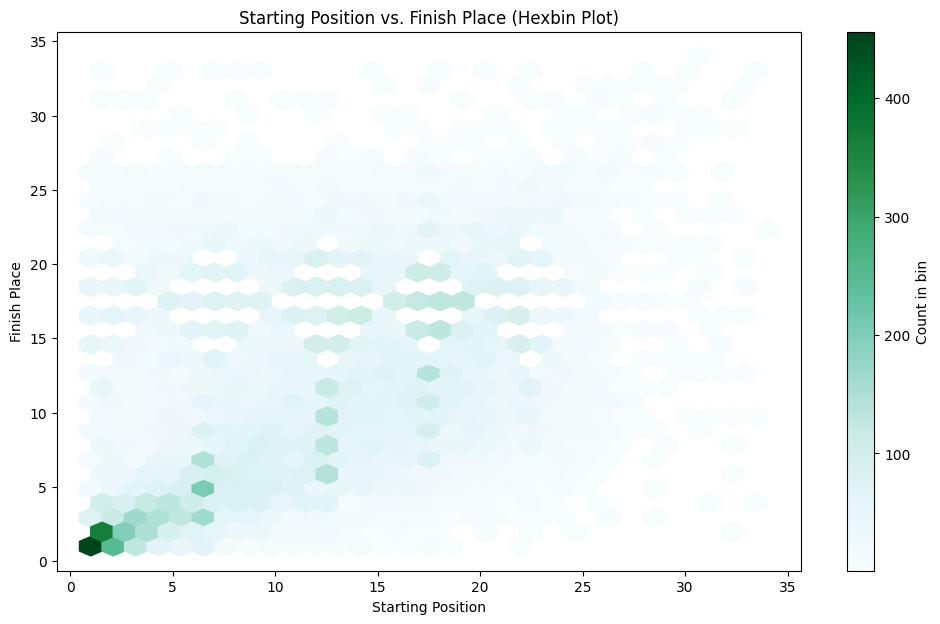

In [38]:
df_no_zero = df[df['grid'] != 0]

# plot de hexbin
plt.figure(figsize=[12, 7])

# 'mincnt=1' los hexagonos con almenos uno se mostrarán
plt.hexbin(df_no_zero['grid'], df_no_zero['positionOrder'], gridsize=30, cmap='BuGn', mincnt=1)

#barra de color par amostrar la escalsa
plt.colorbar(label='Count in bin')

plt.title('Starting Position vs. Finish Place (Hexbin Plot)')
plt.xlabel('Starting Position')
plt.ylabel('Finish Place')

plt.show()


In [39]:
df_no_zero['positionOrder'].max()

34

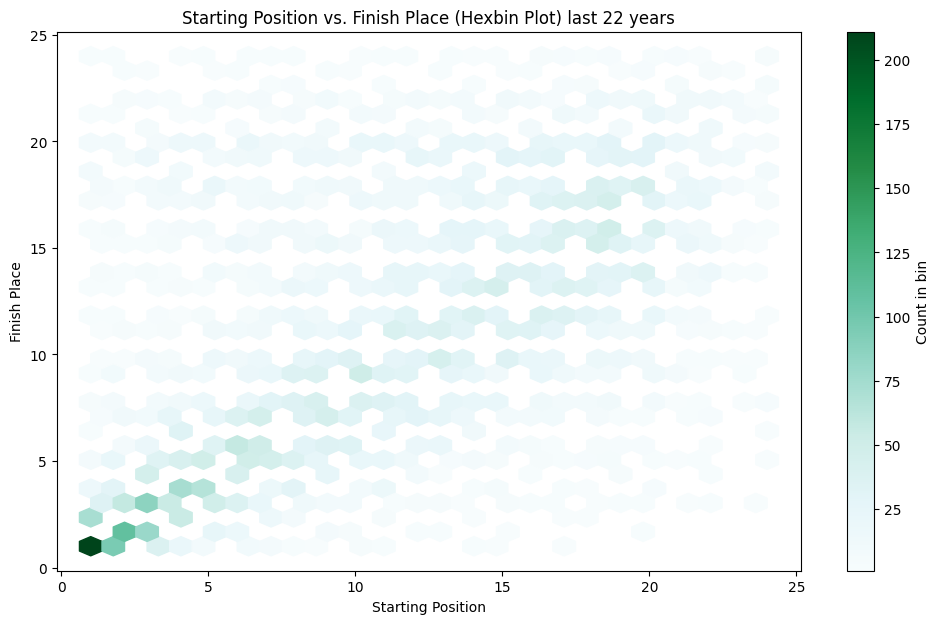

In [40]:

# plot de hexbin
plt.figure(figsize=[12, 7])

# 'mincnt=1' los hexagonos con almenos uno se mostrarán
plt.hexbin(df_no_zero_2['grid'], df_no_zero_2['positionOrder'], gridsize=30, cmap='BuGn', mincnt=1)

#barra de color par amostrar la escalsa
plt.colorbar(label='Count in bin')

plt.title('Starting Position vs. Finish Place (Hexbin Plot) last 22 years')
plt.xlabel('Starting Position')
plt.ylabel('Finish Place')

plt.show()

In [41]:
unique_start_positions = df_no_zero['grid'].unique()

probabilities_df = pd.DataFrame(index=unique_start_positions, columns=np.arange(1, 35))

for start_grid in unique_start_positions:
    for finish_pos in probabilities_df.columns:
        count = df_no_zero[(df_no_zero['grid'] == start_grid) & (df_no_zero['positionOrder'] == finish_pos)].shape[0]
        total_starts = df_no_zero[df_no_zero['grid'] == start_grid].shape[0]
        probabilities_df.at[start_grid, finish_pos] = count / total_starts if total_starts > 0 else 0

probabilities_df = probabilities_df.sort_index()

probabilities_df = probabilities_df.fillna(0)

# Show the DataFrame
probabilities_df.head()
#probabilities_df.to_csv('f1_probabilities.csv')


,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
1,0.421832,0.135985,0.066605,0.042553,0.019426,0.017576,0.012026,0.016651,0.013876,0.009251,...,0.006475,0.003700,0.002775,0.000000,0.000000,0.000000,0.000925,0.000000,0.000000,0.0
2,0.234360,0.205415,0.110177,0.052288,0.037348,0.014939,0.030812,0.014939,0.018674,0.009337,...,0.005602,0.003735,0.000934,0.001867,0.000000,0.000000,0.000000,0.000000,0.000934,0.0
3,0.120000,0.184186,0.155349,0.082791,0.057674,0.032558,0.016744,0.021395,0.020465,0.015814,...,0.005581,0.006512,0.000000,0.000000,0.000000,0.000000,0.000930,0.000000,0.000000,0.0
4,0.061281,0.138347,0.137419,0.115135,0.069638,0.052925,0.039926,0.020427,0.021356,0.019499,...,0.004643,0.004643,0.000000,0.000000,0.000929,0.000000,0.000929,0.000929,0.000000,0.0
5,0.044568,0.086351,0.120706,0.122563,0.081708,0.051996,0.041783,0.027855,0.027855,0.028784,...,0.003714,0.006500,0.001857,0.000000,0.000929,0.001857,0.000000,0.000000,0.000929,0.0


In [42]:
unique_start_positions_2000 = df_no_zero_2['grid'].unique()

probabilities_df_2000 = pd.DataFrame(index=unique_start_positions_2000, columns=np.arange(1, 25))

for start_grid in unique_start_positions_2000:
    for finish_pos in probabilities_df_2000.columns:
        count = df_no_zero_2[(df_no_zero_2['grid'] == start_grid) & (df_no_zero_2['positionOrder'] == finish_pos)].shape[0]
        total_starts_2000 = df_no_zero_2[df_no_zero_2['grid'] == start_grid].shape[0]
        probabilities_df_2000.at[start_grid, finish_pos] = count / total_starts_2000 if total_starts_2000 > 0 else 0

probabilities_df_2000 = probabilities_df_2000.sort_index()

probabilities_df_2000 = probabilities_df_2000.fillna(0)

probabilities_df_2000.head()
probabilities_df_2000.to_csv('f1_probabilities_2000_2.csv')

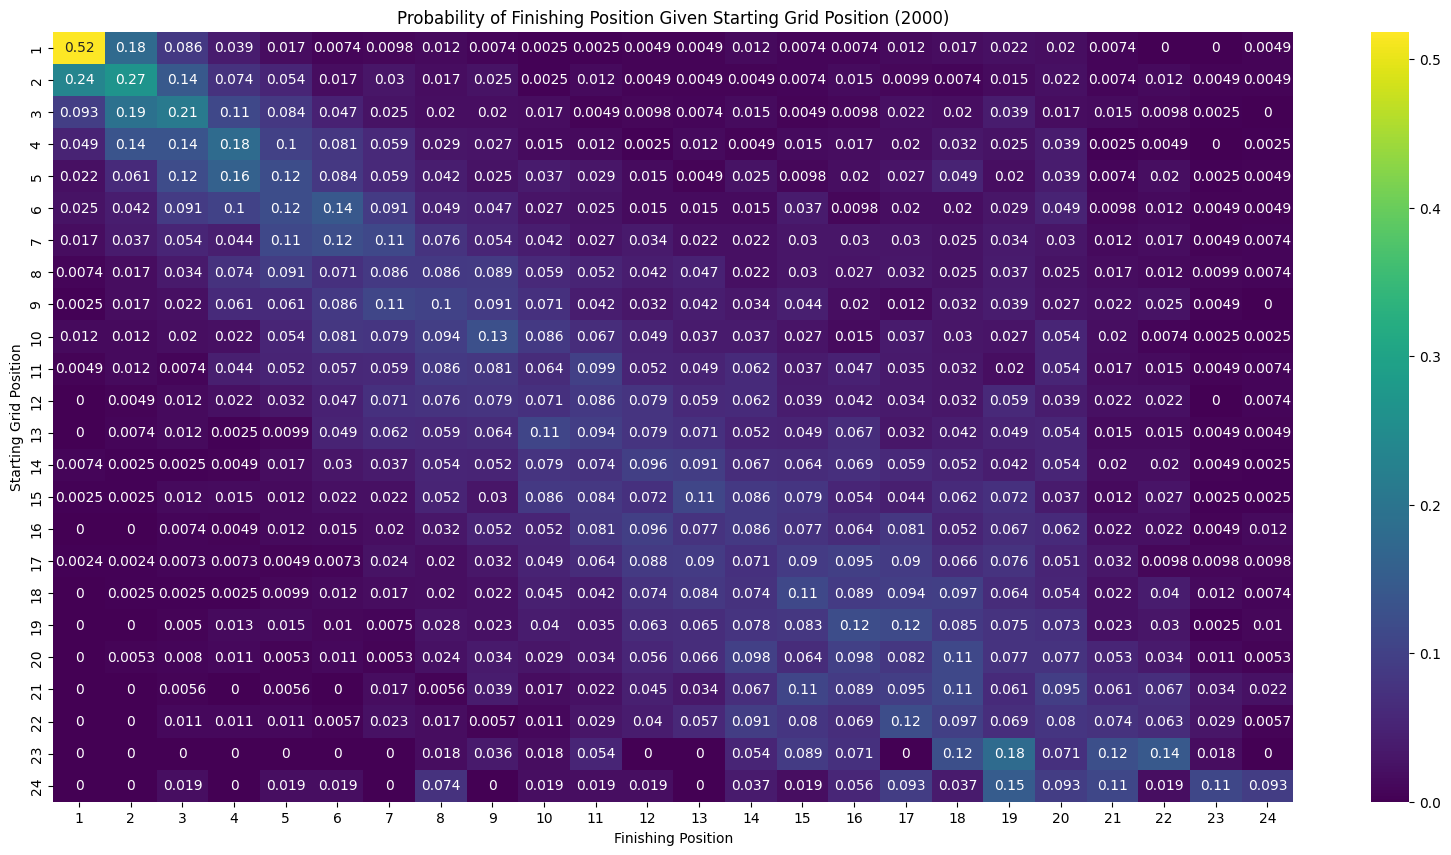

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))  # Set the figure size as width, height in inches
sns.heatmap(probabilities_df_2000, cmap='viridis', annot=True)  # 'annot=True' to annotate cells with probability values
plt.title('Probability of Finishing Position Given Starting Grid Position (2000)')
plt.xlabel('Finishing Position')
plt.ylabel('Starting Grid Position')
plt.show()


In [44]:
# nuevo dataframe para temporadas de  2004 en adelante
df_speed = df[df['year'] >= 2004]
df_group_speed = df_speed.groupby(['gp_name','year'])['fastestLapSpeed'].mean().to_frame().reset_index()


In [45]:
df_group_speed

,gp_name,year,fastestLapSpeed
0,70th Anniversary Grand Prix,2020,234.248250
1,Abu Dhabi Grand Prix,2009,198.041100
2,Abu Dhabi Grand Prix,2010,193.559045
3,Abu Dhabi Grand Prix,2011,189.779522
4,Abu Dhabi Grand Prix,2012,187.682739
...,...,...,...
352,United States Grand Prix,2016,191.745143
353,United States Grand Prix,2017,197.839400
354,United States Grand Prix,2018,199.424944
355,United States Grand Prix,2021,197.076800


In [46]:
#Una vez que se tine la correlación de la importnacia del grid con el lugar en el que se acabó
#Se conluye que las qualis son de vital importancia

In [47]:
#Ahora se tendrá que ver que tan determinantes son los pit stops